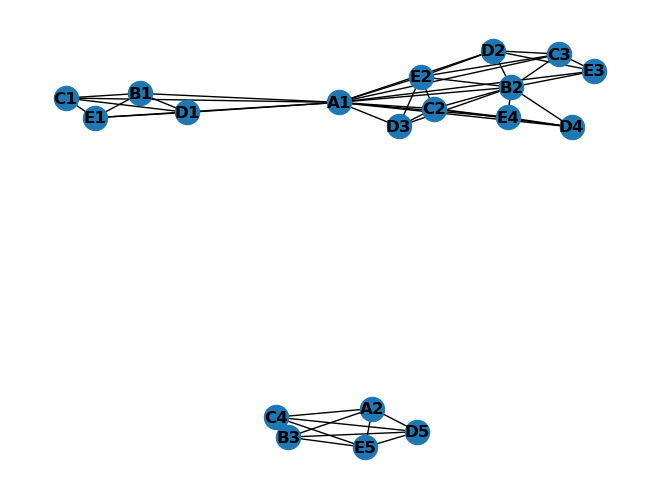

In [1]:
from treelib import Node, Tree
import networkx as nx
import random

class GraphAnalyzer:
    def __init__(self):
        pass
    
    def create_easyGraph(self):
        G = nx.Graph()
        G.add_nodes_from(['A1', 'A2', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4'])
        G.add_edges_from([
            ('A1', 'B1'), ('A1', 'B2'), ('A1', 'C1'), ('A1', 'C2'), ('A1', 'C3'), ('B1', 'C1'),
            ('B2', 'C2'), ('B2', 'C3'),
            ('A2', 'C4'), ('A2', 'B3'), ('B3', 'C4')
        ])
    
        # Add random weights to all edges
        for u, v in G.edges():
            G[u][v]['weight'] = round(random.uniform(0.1, 1.0), 3)

        return G
        
    def create_advanced_graph(self):
        G = nx.Graph()
        G.add_nodes_from(['A1', 'A2', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5'])
        G.add_edges_from([
            ('A1','B1'),('A1','B2'),('A1','C1'),('A1','C2'),('A1','C3'),('A1','D1'),('A1','D2'),('A1','D3'),('A1','D4'),('A1','E1'),('A1','E2'),('A1','E3'),('A1','E4'),
            ('A2','B3'),('A2','C4'),('A2','D5'),('A2','E5'),
            ('B1','C1'),('B1','D1'),('B1','E1'),
            ('B2','C2'),('B2','D2'),('B2','E2'),('B2','C3'),('B2','D3'),('B2','D4'),('B2','E3'),('B2','E4'),
            ('B3','C4'),('B3','D5'),('B3','E5'),
            ('C1','D1'),('C1','E1'),
            ('C2','D3'),('C2','D4'),('C2','E4'),('C2','E2'),
            ('C3','D2'),('C3','E2'),('C3','E3'),
            ('C4','D5'),('C4','E5'),
            ('D1','E1'),
            ('D2','E2'),('D2','E3'),
            ('D3','E2'),
            ('D4','E4'),
            ('D5','E5'),]
        
        )
        # Add random weights to all edges that simulate a pair of jaccardian similarity and jaccardian similiarity 
        for u, v in G.edges():
            G[u][v]['weight'] = round(random.uniform(0.1, 1.0), 3)
            
        return G

    def is_complete_graph(self, G):
        """
        Check if a graph is complete.

        Parameters:
        - G: NetworkX graph

        Returns:
        - True if the graph is complete, False otherwise
        """
        for node in G:
            if len(G[node]) != len(G) - 1:
                return False
        return True

    def is_same_connections(self, graph, node1, node2):
        """
        Checks if two nodes have the same connections in a graph.
        
        Parameters:
        - graph: NetworkX graph
        - node1: node identifier
        - node2: node identifier
        
        Returns:
        - bool: True if nodes have the same connections, False otherwise
        """
        try:
            return (graph.neighbors(node1)) == set(graph.neighbors(node2))
        except:
            return False

    def all_connection_similar_but_to_each_other(self, graph, node1, node2):
        """
        Checks if two nodes have the same connections in a graph but are not connected to each other.

        Parameters:
        - graph: NetworkX graph
        - node1: node identifier
        - node2: node identifier

        Returns:
        - bool: True if nodes have the same connections but are not connected to each other, False otherwise
        """
        try:
            set1 = set(graph.neighbors(node1))
            set2 = set(graph.neighbors(node2))

            if node2 in set1:
                set1.remove(node2)
            if node1 in set2:
                set2.remove(node1)

            return set1 == set2
        except Exception as e:
            print(f"An error occurred: {e}")
            return False

    def connected(self, graph, node1, node2):
        """
        Checks if two nodes are connected in a graph.

        Parameters:
        - graph: NetworkX graph
        - node1: node identifier
        - node2: node identifier

        Returns:
        - bool: True if nodes are connected, False otherwise
        """
        try:
            return nx.has_path(graph, node1, node2)
        except:
            return False

    def analyze_cliques(self, G):
        """
        Analyze cliques in the graph.
    
        Parameters:
        - G: NetworkX graph
    
        Returns:
        - List of selected cliques
        """
        cliques = [clique for clique in nx.find_cliques(G) if all(G[u][v]['weight'] > 0.2 for u, v in nx.utils.pairwise(clique))]

        avg_jaccard_values = {}
        for clique in cliques:
            total_jaccard_value = sum(G[u][v]['weight'] for u, v in nx.utils.pairwise(clique))
            avg_jaccard_value = total_jaccard_value / len(clique)
            avg_jaccard_values[tuple(clique)] = avg_jaccard_value
    
        sorted_cliques = sorted(avg_jaccard_values.keys(), key=lambda x: avg_jaccard_values[x], reverse=True)
    
        assigned_nodes = set()
        selected_cliques = []
    
        for clique in sorted_cliques:
            if not assigned_nodes.intersection(clique):
                selected_cliques.append(clique)
                assigned_nodes.update(clique)
    
        new_graph = G.copy()
    
        for clique in selected_cliques:
            new_node = ''.join(clique)
            new_graph.add_node(new_node)
            new_graph.remove_nodes_from(clique)
            for node in clique:
                for neighbor in G.neighbors(node):
                    if neighbor not in clique and neighbor in new_graph.nodes():
                        new_graph.add_edge(new_node, neighbor)
    
        print("New graph nodes:", new_graph.nodes())
    
        # You can return the new graph if needed
        return new_graph, selected_cliques

    def find_complete_subgraphs_in_connected_graph(self, G, current_graph, tree, last_node=None, number_splits=None):
        """
        Creates a tree of complete subgraphs of a connected graph
        Please make sure to only insert connected graphs into this function
        
        Parameters:
        - G: NetworkX graph
        - current_graph: list of nodes
        - tree: treelib Tree
        - last_node: last node added to the tree
        
        Returns:
        - None
        """
        if number_splits is None:
            number_splits = []
            number_splits.append(0)
        number_splits[0] = number_splits[0] + 1
        if last_node is None:
            if self.is_complete_graph(G.subgraph(current_graph)):
                name = ''.join(current_graph)
                tree.create_node(name + "(" + str(number_splits[0]) + ")", name+ "(" + str(number_splits[0]) + ")")
                print("complete graph", name)
            else:
                most_connected_nodes = [max(current_graph, key=lambda x: len(G[x]))]
                for node in current_graph:
                    if len(G[node]) == len(G[most_connected_nodes[0]]) and node != most_connected_nodes[0]:
                        most_connected_nodes.append(node)
                if len(most_connected_nodes) > 1:
                    print("case more than one most connected node")
                    print("most connected nodes", most_connected_nodes)
                    tree.create_node("root", "root")
                    for node in most_connected_nodes:
                        most_connected_node = node
                        edited_graph = G.copy()
                        for node in most_connected_nodes:
                            if node != most_connected_node:
                                edited_graph.remove_node(node)
                        for node in current_graph:
                            if not self.connected(edited_graph, most_connected_node, node):
                                try:
                                    edited_graph.remove_node(node)
                                except:
                                    continue
                        for current_subgraph in nx.connected_components(edited_graph):
                            self.find_complete_subgraphs_in_connected_graph(G, current_subgraph, tree, 'root', number_splits)
                else:
                    print("case one most connected node")
                    most_connected_node = most_connected_nodes[0]
                    print("most connected node", most_connected_node)
                    tree.create_node(most_connected_node+ "(" + str(number_splits[0]) + ")", most_connected_node+ "(" + str(number_splits[0]) + ")")
                    last_node = tree.get_node(most_connected_node + "(" + str(number_splits[0]) + ")")
                    edited_graph = G.copy()
                    edited_graph.remove_node(most_connected_node)
                    for current_subgraph in nx.connected_components(edited_graph):
                        self.find_complete_subgraphs_in_connected_graph(G, current_subgraph, tree, last_node, number_splits)
        else:
            if self.is_complete_graph(G.subgraph(current_graph)):
                name = ''.join(current_graph)
                tree.create_node(name+ "(" + str(number_splits[0]) + ")", name+ "(" + str(number_splits[0]) + ")", parent=last_node)
                print("complete graph", name)
            else:
                most_connected_nodes = [max(current_graph, key=lambda x: len(G[x]))]
                for node in current_graph:
                    if len(G[node]) == len(G[most_connected_nodes[0]]) and node != most_connected_nodes[0]:
                        most_connected_nodes.append(node)
                if len(most_connected_nodes) > 1:
                    print("case more than one most connected node")
                    print("most connected nodes", most_connected_nodes)
                    for node in most_connected_nodes:
                        print("iteration")
                        most_connected_node = node
                        edited_graph = G.subgraph(current_graph).copy()
                        for node in most_connected_nodes:
                            if node != most_connected_node:
                                edited_graph.remove_node(node)
                        for node in current_graph:
                            if not self.connected(edited_graph, most_connected_node, node):
                                try:
                                    edited_graph.remove_node(node)
                                except:
                                    continue
    
                        print("added:", most_connected_node + "(" + str(number_splits[0]) + ")")
                        print("to parent", last_node)
                        for current_subgraph in nx.connected_components(edited_graph):
                            print("-number", number_splits[0])
                            print("-last node", last_node)
                            print("-most connected node", most_connected_node + "(" + str(number_splits[0]) + ")")
                            print("-current subgraph", current_subgraph)
                            self.find_complete_subgraphs_in_connected_graph(G, current_subgraph, tree, last_node, number_splits)
                else:
                    print("case one most connected node")
                    most_connected_node = most_connected_nodes[0]
                    print("most connected node", most_connected_node)
                    tree.create_node(most_connected_node+ "(" + str(number_splits[0]) + ")", most_connected_node+ "(" + str(number_splits[0]) + ")", parent=last_node)
                    last_node = tree.get_node(most_connected_node + "(" + str(number_splits[0]) + ")")
                    edited_graph = G.subgraph(current_graph).copy()
                    edited_graph.remove_node(most_connected_node)
                    for current_subgraph in nx.connected_components(edited_graph):
                        self.find_complete_subgraphs_in_connected_graph(G, current_subgraph, tree, last_node, number_splits)
    def doAll(self,G):
        trees = []
        for g in nx.connected_components(G):
            tree = Tree()
            graph = G.subgraph(g)
            analyzer.find_complete_subgraphs_in_connected_graph(graph, graph, tree)
            trees.append(tree)
        
        # Print all trees
        for tree in trees:
            tree.show()
            print("---")


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from treelib import Node, Tree

analyzer = GraphAnalyzer()
G = analyzer.create_advanced_graph()
analyzer.doAll(G)


case one most connected node
most connected node A1
complete graph B1C1E1D1
case one most connected node
most connected node B2
case more than one most connected node
most connected nodes ['E2', 'C2']
iteration
added: E2(4)
to parent Node(tag=B2(3), identifier=B2(3), data=None)
-number 4
-last node Node(tag=B2(3), identifier=B2(3), data=None)
-most connected node E2(4)
-current subgraph {'C3', 'D3', 'E2', 'E3', 'D2'}
case one most connected node
most connected node E2
complete graph C3E3D2
complete graph D3
iteration
added: C2(7)
to parent Node(tag=B2(3), identifier=B2(3), data=None)
-number 7
-last node Node(tag=B2(3), identifier=B2(3), data=None)
-most connected node C2(7)
-current subgraph {'D4', 'D3', 'C2', 'E4'}
case one most connected node
most connected node C2
complete graph D4E4
complete graph D3
complete graph B3C4E5D5A2
A1(1)
├── B1C1E1D1(2)
└── B2(3)
    ├── C2(8)
    │   ├── D3(10)
    │   └── D4E4(9)
    └── E2(5)
        ├── C3E3D2(6)
        └── D3(7)

---
B3C4E5D5A2(1)